<a href="https://colab.research.google.com/github/SiHanWang2Developer/data/blob/master/%E2%80%9C%E2%80%9C%E5%9D%9A%E6%9E%9C%E6%94%B9%E9%80%A0%E7%AC%94%E7%94%BBcuda_error%E2%80%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [How to train Detectron2 with Custom COCO Datasets](https://www.dlology.com/blog/how-to-train-detectron2-with-custom-coco-datasets/) | DLology

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

This notebook will help you get started with this framwork by training a instance segmentation model with your custom COCO datasets.

# Install detectron2

In [0]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__

In [0]:
# install detectron2:
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

In [0]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Train on a custom COCO dataset

In this section, we show how to train an existing detectron2 model on a custom dataset in a new format.

We use [the fruits nuts segmentation dataset](https://github.com/Tony607/mmdetection_instance_segmentation_demo)
which only has 3 classes: data, fig, and hazelnut.
We'll train a segmentation model from an existing model pre-trained on the COCO dataset, available in detectron2's model zoo.

Note that the COCO dataset does not have the "data", "fig" and "hazelnut" categories.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# # download, decompress the data
# !wget https://github.com/Tony607/detectron2_instance_segmentation_demo/releases/download/V0.1/data.zip
# !unzip data.zip > /dev/null

In [0]:
# #笔画段数据集 download, decompress the data
# !wget https://github.com/SiHanWang2Developer/sufazidata/archive/v5.0.zip
# !unzip v5.0.zip > /dev/null

In [0]:

# #笔画段数据集 download, decompress the data
# !wget https://github.com/SiHanWang2Developer/sufazidata/archive/v6.0.zip
# !unzip v6.0.zip > /dev/null

Register the fruits_nuts dataset to detectron2, following the [detectron2 custom dataset tutorial](https://detectron2.readthedocs.io/tutorials/datasets.html).


In [0]:
# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("fruits_nuts", {}, "./data/trainval.json", "./data/images")

In [0]:
# fruits_nuts_metadata = MetadataCatalog.get("fruits_nuts")
# dataset_dicts = DatasetCatalog.get("fruits_nuts")

[03/26 02:56:00 d2.data.datasets.coco]: Loaded 18 images in COCO format from ./data/trainval.json




---


下面 笔画数据集



In [0]:
# from detectron2.data.datasets import register_coco_instances
# register_coco_instances("bihua", {}, "./sufazidata-5.0/cocoData/pic/pic1.json", "./sufazidata-5.0/cocoData/pic/images")

In [0]:
# bihua_metadata = MetadataCatalog.get("bihua")
# bihuadataset_dicts = DatasetCatalog.get("bihua")

In [0]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("wzb", {}, "./drive/My Drive/pic500_28class/train.json", "./drive/My Drive/pic500_28class/images")

In [19]:
wanzheng_metadata = MetadataCatalog.get("wzb")
wanzhengdataset_dicts = DatasetCatalog.get("wzb")

[03/27 01:02:26 d2.data.datasets.coco]: Loaded 500 images in COCO format from ./drive/My Drive/pic500_28class/train.json


To verify the data loading is correct, let's visualize the annotations of randomly selected samples in the training set:



In [0]:
# #坚果数据集
# import random

# for d in random.sample(dataset_dicts, 1):
#    img = cv2.imread(d["file_name"])#!!!!!!!!!!!!!!!!!！！！！！！！！！！！
#    visualizer = Visualizer(img[:, :, ::-1], metadata=fruits_nuts_metadata, scale=0.5)
#    vis = visualizer.draw_dataset_dict(d)
#    cv2_imshow(vis.get_image()[:, :, ::-1])
#    cv2_imshow(img)

In [0]:
# #笔画数据集
# import random
# for d in random.sample(bihuadataset_dicts, 3):
#     img = cv2.imread(d["file_name"])
#     visualizer = Visualizer(img[:, :, ::-1], metadata=bihua_metadata, scale=0.5)
#     vis = visualizer.draw_dataset_dict(d)
#     cv2_imshow(vis.get_image()[:, :, ::-1])

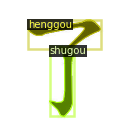

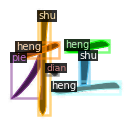

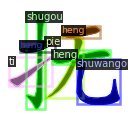

In [20]:
#笔画数据集
import random
for d in random.sample(wanzhengdataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=wanzheng_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

Now, let's fine-tune a coco-pretrained R50-FPN Mask R-CNN model on the fruits_nuts dataset. It takes ~6 minutes to train 300 iterations on Colab's K80 GPU.


In [0]:
# !git clone https://github.com/facebookresearch/detectron2 detectron2_repo
# !pip install -e detectron2_repo

In [0]:
# from detectron2.engine import DefaultTrainer
# from detectron2.config import get_cfg
# import os

# cfg = get_cfg()
# cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# cfg.DATASETS.TRAIN = ("fruits_nuts",)
# cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
# cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.SOLVER.BASE_LR = 0.02
# cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 3  # 3 classes (data, fig, hazelnut)

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

In [0]:
# from detectron2.engine import DefaultTrainer
# from detectron2.config import get_cfg
# import os

# cfg = get_cfg()
# cfg.merge_from_file("./detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
# cfg.DATASETS.TRAIN = ("bihua",)
# cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
# cfg.DATALOADER.NUM_WORKERS = 2
# cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
# cfg.SOLVER.IMS_PER_BATCH = 2
# cfg.SOLVER.BASE_LR = 0.02
# cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
# cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
# cfg.MODEL.ROI_HEADS.NUM_CLASSES = 32  # 32 classes (data, fig, hazelnut)

# os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
# trainer = DefaultTrainer(cfg)
# trainer.resume_or_load(resume=False)
# trainer.train()

In [21]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file("./drive/My Drive/Colab Notebooks/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.DATASETS.TRAIN = ("wzbh",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "detectron2://COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl"  # initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 29  # 1+28 classes (heng,shu....)

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()


[03/27 01:02:39 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

'roi_heads.box_predictor.cls_score.weight' has shape (81, 1024) in the checkpoint but (30, 1024) in the model! Skipped.
'roi_heads.box_predictor.cls_score.bias' has shape (81,) in the checkpoint but (30,) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.weight' has shape (320, 1024) in the checkpoint but (116, 1024) in the model! Skipped.
'roi_heads.box_predictor.bbox_pred.bias' has shape (320,) in the checkpoint but (116,) in the model! Skipped.
'roi_heads.mask_head.predictor.weight' has shape (80, 256, 1, 1) in the checkpoint but (29, 256, 1, 1) in the model! Skipped.
'roi_heads.mask_head.predictor.bias' has shape (80,) in the checkpoint but (29,) in the model! Skipped.


[03/27 01:02:39 d2.engine.train_loop]: Starting training from iteration 0
[03/27 01:02:47 d2.utils.events]:  eta: 0:01:40  iter: 19  total_loss: 4.348  loss_cls: 2.543  loss_box_reg: 0.928  loss_mask: 0.680  loss_rpn_cls: 0.068  loss_rpn_loc: 0.073  time: 0.3595  data_time: 0.0267  lr: 0.000400  max_mem: 13765M
[03/27 01:02:54 d2.utils.events]:  eta: 0:01:32  iter: 39  total_loss: 2.627  loss_cls: 1.092  loss_box_reg: 0.936  loss_mask: 0.495  loss_rpn_cls: 0.015  loss_rpn_loc: 0.062  time: 0.3550  data_time: 0.0048  lr: 0.000799  max_mem: 13765M
[03/27 01:03:01 d2.utils.events]:  eta: 0:01:25  iter: 59  total_loss: 2.027  loss_cls: 0.800  loss_box_reg: 0.842  loss_mask: 0.261  loss_rpn_cls: 0.015  loss_rpn_loc: 0.061  time: 0.3570  data_time: 0.0107  lr: 0.001199  max_mem: 13765M
[03/27 01:03:08 d2.utils.events]:  eta: 0:01:19  iter: 79  total_loss: 1.558  loss_cls: 0.621  loss_box_reg: 0.667  loss_mask: 0.151  loss_rpn_cls: 0.009  loss_rpn_loc: 0.066  time: 0.3593  data_time: 0.0050  

Now, we perform inference with the trained model on the fruits_nuts dataset. First, let's create a predictor using the model we just trained:



In [0]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("wzbh", )
predictor = DefaultPredictor(cfg)

Then, we randomly select several samples to visualize the prediction results.

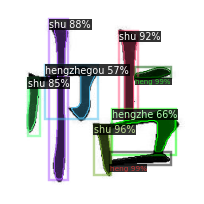

In [23]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(wanzhengdataset_dicts, 1):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=wanzheng_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(v.get_image()[:, :, ::-1])

In [0]:
fruits_nuts_metadata

Metadata(evaluator_type='coco', image_root='./data/images', json_file='./data/trainval.json', name='fruits_nuts', thing_classes=['date', 'fig', 'hazelnut'], thing_dataset_id_to_contiguous_id={1: 0, 2: 1, 3: 2})

## Benchmark inference speed

In [24]:
import time
times = []
for i in range(20):
    start_time = time.time()
    outputs = predictor(im)
    delta = time.time() - start_time
    times.append(delta)
mean_delta = np.array(times).mean()
fps = 1 / mean_delta
print("Average(sec):{:.2f},fps:{:.2f}".format(mean_delta, fps))

Average(sec):0.10,fps:9.72
